<a href="https://colab.research.google.com/github/nicobotti91/coderds/blob/main/ProyectoDSParteII_Botti.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import de Librerías


In [155]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


## Lectura de DataFrames

In [156]:
df_orders = pd.read_csv('https://raw.githubusercontent.com/nicobotti91/coderds/refs/heads/main/Target_sales/orders.csv')

In [157]:
df_order_items = pd.read_csv('https://raw.githubusercontent.com/nicobotti91/coderds/refs/heads/main/Target_sales/order_items.csv')

In [158]:
df_products = pd.read_csv('https://raw.githubusercontent.com/nicobotti91/coderds/refs/heads/main/Target_sales/products.csv')

In [159]:
df_sellers = pd.read_csv('https://raw.githubusercontent.com/nicobotti91/coderds/refs/heads/main/Target_sales/sellers.csv')

In [160]:
df_geolocation = pd.read_csv('https://raw.githubusercontent.com/nicobotti91/coderds/refs/heads/main/Target_sales/geolocation.csv')

In [161]:
df_payments = pd.read_csv('https://raw.githubusercontent.com/nicobotti91/coderds/refs/heads/main/Target_sales/payments.csv')

In [162]:
df_customers = pd.read_csv('https://raw.githubusercontent.com/nicobotti91/coderds/refs/heads/main/Target_sales/customers.csv')

## Análisis de estado de DataFrames, Merge & Limpieza

In [163]:
df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [164]:
df_order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [165]:
df_products.head()

,product_id,product category,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,Art,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,sport leisure,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,babies,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,housewares,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [166]:
df_products.drop(columns=['product_name_length','product_description_length','product_photos_qty'], axis=1, inplace=True)
df_products.head()

,product_id,product category,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,Art,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,sport leisure,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,babies,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,housewares,625.0,20.0,17.0,13.0


In [167]:
df_sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [168]:
df_geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [169]:
df_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [170]:
df_customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [171]:
df_merge_v1 =  df_orders.merge(
    df_order_items,
    how ='inner',
    on= 'order_id'
)

In [172]:
df_merge_v2 =  df_merge_v1.merge(
    df_products,
    how ='inner',
    on= 'product_id'
)
df_merge_v2.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product category,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,housewares,500.0,19.0,8.0,13.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,perfumery,400.0,19.0,13.0,19.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,automotive,420.0,24.0,19.0,21.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,pet Shop,450.0,30.0,10.0,20.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,stationary store,250.0,51.0,15.0,15.0


In [173]:
df_merge_v3 =  df_merge_v2.merge(
    df_sellers,
    how ='inner',
    on= 'seller_id'
)


In [174]:
df_merge_v4 =  df_merge_v3.merge(
    df_payments,
    how ='inner',
    on= 'order_id'
)
df_target_sales.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,...,seller_state,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,mes_anyo
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,...,SP,1,credit_card,1,18.12,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,201710
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,...,SP,3,voucher,1,2.00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,201710
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,...,SP,2,voucher,1,18.59,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,201710
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-08-13 00:00:00,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,...,SP,1,UPI,1,141.46,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,201807
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-09-04 00:00:00,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,...,SP,1,credit_card,3,179.12,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,201808


In [175]:
df_merged_ok =  df_merge_v4.merge(
    df_customers,
    how ='inner',
    on= 'customer_id'
)
df_merged_ok.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,seller_city,seller_state,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,...,maua,SP,1,credit_card,1,18.12,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,...,maua,SP,3,voucher,1,2.00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,...,maua,SP,2,voucher,1,18.59,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,595fac2a385ac33a80bd5114aec74eb8,...,belo horizonte,SP,1,UPI,1,141.46,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,aa4383b373c6aca5d8797843e5594415,...,guariba,SP,1,credit_card,3,179.12,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO


In [176]:
# Tamaño del DataFrame

df_merged_ok.shape

(117601, 30)

In [177]:
# Info del DataFrame

df_merged_ok.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117601 entries, 0 to 117600
Data columns (total 30 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       117601 non-null  object 
 1   customer_id                    117601 non-null  object 
 2   order_status                   117601 non-null  object 
 3   order_purchase_timestamp       117601 non-null  object 
 4   order_approved_at              117586 non-null  object 
 5   order_delivered_carrier_date   116356 non-null  object 
 6   order_delivered_customer_date  115034 non-null  object 
 7   order_estimated_delivery_date  117601 non-null  object 
 8   order_item_id                  117601 non-null  int64  
 9   product_id                     117601 non-null  object 
 10  seller_id                      117601 non-null  object 
 11  shipping_limit_date            117601 non-null  object 
 12  price                         

In [178]:
# Contabilizar los NaN
df_merged_ok.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,15
order_delivered_carrier_date,1245
order_delivered_customer_date,2567
order_estimated_delivery_date,0
order_item_id,0
product_id,0


In [179]:
df_merged_ok.drop(columns=['order_delivered_carrier_date','order_delivered_customer_date'], axis=1, inplace=True)
df_merged_ok.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,15
order_estimated_delivery_date,0
order_item_id,0
product_id,0
seller_id,0
shipping_limit_date,0


In [180]:
# Borrar filas con NaN & Tamaño del DataFrame post eliminación

df_merged_ok_cleaned = df_merged_ok.dropna()
df_merged_ok_cleaned.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,0
order_estimated_delivery_date,0
order_item_id,0
product_id,0
seller_id,0
shipping_limit_date,0


In [181]:
# Pasar la fecha a formato fecha
df_merged_ok_cleaned['order_purchase_timestamp'] = pd.to_datetime(df_merged_ok_cleaned['order_purchase_timestamp'])

<ipython-input-181-d99eba3de405>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged_ok_cleaned['order_purchase_timestamp'] = pd.to_datetime(df_merged_ok_cleaned['order_purchase_timestamp'])


In [182]:
# Pasar la fecha a formato Mes y Año
df_merged_ok_cleaned.loc[:, 'mes_anyo'] = df_merged_ok_cleaned['order_purchase_timestamp'].dt.strftime('%Y%m')
df_merged_ok_cleaned.head()

<ipython-input-182-852e9acc6e48>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged_ok_cleaned.loc[:, 'mes_anyo'] = df_merged_ok_cleaned['order_purchase_timestamp'].dt.strftime('%Y%m')


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,...,seller_state,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,mes_anyo
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,...,SP,1,credit_card,1,18.12,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,201710
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,...,SP,3,voucher,1,2.00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,201710
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,...,SP,2,voucher,1,18.59,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,201710
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-08-13 00:00:00,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,...,SP,1,UPI,1,141.46,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,201807
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-09-04 00:00:00,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,...,SP,1,credit_card,3,179.12,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,201808


In [183]:
df_merged_ok_cleaned['mes_anyo'] = df_merged_ok_cleaned['mes_anyo'].astype(int)

<ipython-input-183-75bc4c0d441d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged_ok_cleaned['mes_anyo'] = df_merged_ok_cleaned['mes_anyo'].astype(int)


In [184]:
#Renombrar la columna product category
df_merged_ok_cleaned.rename(columns={'product category':'product_category'}, inplace=True)
df_merged_ok_cleaned.head()

<ipython-input-184-13c4ef3f8b72>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged_ok_cleaned.rename(columns={'product category':'product_category'}, inplace=True)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,...,seller_state,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,mes_anyo
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,...,SP,1,credit_card,1,18.12,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,201710
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,...,SP,3,voucher,1,2.00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,201710
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,...,SP,2,voucher,1,18.59,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,201710
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-08-13 00:00:00,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,...,SP,1,UPI,1,141.46,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,201807
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-09-04 00:00:00,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,...,SP,1,credit_card,3,179.12,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,201808


In [185]:
#Tamaño data Frame post eliminación de NaN
df_merged_ok_cleaned.shape

(115888, 29)

In [186]:
#Eliminar Duplicados

df_merged_revised = df_merged_ok_cleaned.drop_duplicates()

In [187]:
#Tamaño Data Frame post Revisión de duplicados
df_merged_revised.shape

(115888, 29)

In [188]:
# Revisar volumetrías de ventas por mes
df_merged_revised.groupby('mes_anyo')['order_id'].count()

,order_id
mes_anyo,
201609,3
201610,379
201612,1
201701,989
201702,1991
201703,3114
201704,2777
201705,4293
201706,3717


In [220]:
# Filtrado de ventas a partir de 2017

df_target_sales = df_merged_revised[(df_merged_revised['mes_anyo'] >= 201701) & (df_merged_revised['mes_anyo'] <= 201808)]
df_target_sales.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,...,seller_state,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,mes_anyo
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,...,SP,1,credit_card,1,18.12,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,201710
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,...,SP,3,voucher,1,2.00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,201710
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,...,SP,2,voucher,1,18.59,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,201710
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-08-13 00:00:00,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,...,SP,1,UPI,1,141.46,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,201807
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-09-04 00:00:00,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,...,SP,1,credit_card,3,179.12,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,201808


In [221]:
df_target_sales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 115504 entries, 0 to 117600
Data columns (total 29 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       115504 non-null  object        
 1   customer_id                    115504 non-null  object        
 2   order_status                   115504 non-null  object        
 3   order_purchase_timestamp       115504 non-null  datetime64[ns]
 4   order_approved_at              115504 non-null  object        
 5   order_estimated_delivery_date  115504 non-null  object        
 6   order_item_id                  115504 non-null  int64         
 7   product_id                     115504 non-null  object        
 8   seller_id                      115504 non-null  object        
 9   shipping_limit_date            115504 non-null  object        
 10  price                          115504 non-null  float64       
 11  freig

In [222]:
df_target_sales.describe()

,order_purchase_timestamp,order_item_id,price,freight_value,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,payment_sequential,payment_installments,payment_value,customer_zip_code_prefix,mes_anyo
count,115504,115504.000000,115504.000000,115504.000000,115504.000000,115504.000000,115504.000000,115504.000000,115504.000000,115504.000000,115504.000000,115504.000000,115504.000000,115504.000000
mean,2018-01-01 23:43:24.359061248,1.196149,120.891395,20.075732,2117.016051,30.307392,16.649960,23.110152,24480.521878,1.092837,2.942920,172.955081,35035.257783,201760.526796
min,2017-01-05 11:56:06,1.000000,0.850000,0.000000,0.000000,7.000000,2.000000,6.000000,1001.000000,1.000000,0.000000,0.000000,1003.000000,201701.000000
25%,2017-09-13 19:47:13.249999872,1.000000,39.900000,13.080000,300.000000,18.000000,8.000000,15.000000,6429.000000,1.000000,1.000000,61.010000,11310.000000,201709.000000
50%,2018-01-20 12:08:08,1.000000,74.900000,16.320000,700.000000,25.000000,13.000000,20.000000,13660.000000,1.000000,2.000000,108.195000,24315.000000,201801.000000
75%,2018-05-05 10:02:56,1.000000,134.900000,21.220000,1800.000000,38.000000,20.000000,30.000000,28470.000000,1.000000,4.000000,189.600000,58428.000000,201805.000000
max,2018-08-29 15:00:37,21.000000,6735.000000,409.680000,40425.000000,105.000000,105.000000,118.000000,99730.000000,29.000000,24.000000,13664.080000,99980.000000,201808.000000
std,NaN,0.699441,184.212783,15.875273,3784.441218,16.223304,13.478417,11.761622,27613.404069,0.725861,2.778055,268.269134,29807.899455,48.103756


<Axes: xlabel='payment_value'>

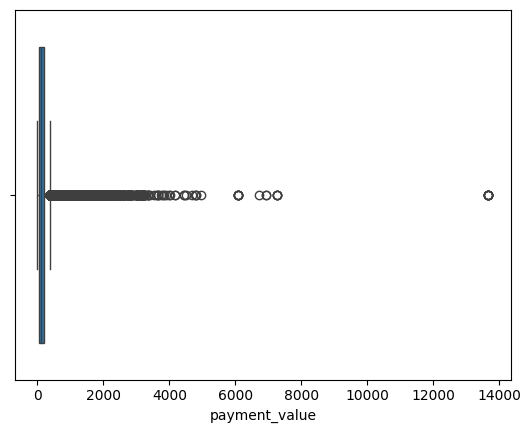

In [198]:
sns.boxplot(x=df_target_sales['payment_value'])

In [201]:
# Generación del DF con outliers para análisis basandonos en el rango intercuartil
Q1 = df_target_sales['payment_value'].quantile(0.25)
Q3 = df_target_sales['payment_value'].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

df_payment_value_outliers = df_target_sales[(df_target_sales['payment_value'] <= limite_inferior) | (df_target_sales['payment_value'] >= limite_superior)]
df_payment_value_outliers[['order_id','product_category','freight_value','payment_installments','payment_type','payment_value']].sort_values('payment_value',ascending=False)


,order_id,product_category,freight_value,payment_installments,payment_type,payment_value
15713,03caa2c082116e1d31e67e9ae3700499,fixed telephony,28.01,1,credit_card,13664.08
15709,03caa2c082116e1d31e67e9ae3700499,fixed telephony,28.01,1,credit_card,13664.08
15710,03caa2c082116e1d31e67e9ae3700499,fixed telephony,28.01,1,credit_card,13664.08
15711,03caa2c082116e1d31e67e9ae3700499,fixed telephony,28.01,1,credit_card,13664.08
15716,03caa2c082116e1d31e67e9ae3700499,fixed telephony,28.01,1,credit_card,13664.08
...,...,...,...,...,...,...
48425,803b1bae34b452deca8621b507e483f4,Cool Stuff,13.79,4,credit_card,382.79
108144,71ebfb916db0911bb0201d56790bc485,HEALTH BEAUTY,18.74,6,credit_card,382.74
53856,4c64f4f7a59f7092060cce91b033d7a9,HEALTH BEAUTY,18.74,1,UPI,382.74
111807,ef160b1ef2464ef2521274c790ee0cef,perfumery,3.65,4,credit_card,382.62


In [208]:
# Análisis de la categoría fixed telephony, categoría con valores más elevados para la columna en análisis "payment_value"

df_payment_value_outliers[df_payment_value_outliers['product_category']=='fixed telephony'].sort_values('payment_value',ascending=False)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,...,seller_state,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,mes_anyo
15712,03caa2c082116e1d31e67e9ae3700499,1617b1357756262bfa56ab541c47bc16,delivered,2017-09-29 15:24:52,2017-10-02 15:28:20,2017-10-23 00:00:00,4,5769ef0a239114ac3a854af00df129e4,b37c4c02bda3161a7546a4e6d222d5b2,2017-10-06 15:28:20,...,SP,1,credit_card,1,13664.08,0a0a92112bd4c708ca5fde585afaa872,20080,rio de janeiro,RJ,201709
15709,03caa2c082116e1d31e67e9ae3700499,1617b1357756262bfa56ab541c47bc16,delivered,2017-09-29 15:24:52,2017-10-02 15:28:20,2017-10-23 00:00:00,1,5769ef0a239114ac3a854af00df129e4,b37c4c02bda3161a7546a4e6d222d5b2,2017-10-06 15:28:20,...,SP,1,credit_card,1,13664.08,0a0a92112bd4c708ca5fde585afaa872,20080,rio de janeiro,RJ,201709
15715,03caa2c082116e1d31e67e9ae3700499,1617b1357756262bfa56ab541c47bc16,delivered,2017-09-29 15:24:52,2017-10-02 15:28:20,2017-10-23 00:00:00,7,5769ef0a239114ac3a854af00df129e4,b37c4c02bda3161a7546a4e6d222d5b2,2017-10-06 15:28:20,...,SP,1,credit_card,1,13664.08,0a0a92112bd4c708ca5fde585afaa872,20080,rio de janeiro,RJ,201709
15714,03caa2c082116e1d31e67e9ae3700499,1617b1357756262bfa56ab541c47bc16,delivered,2017-09-29 15:24:52,2017-10-02 15:28:20,2017-10-23 00:00:00,6,5769ef0a239114ac3a854af00df129e4,b37c4c02bda3161a7546a4e6d222d5b2,2017-10-06 15:28:20,...,SP,1,credit_card,1,13664.08,0a0a92112bd4c708ca5fde585afaa872,20080,rio de janeiro,RJ,201709
15713,03caa2c082116e1d31e67e9ae3700499,1617b1357756262bfa56ab541c47bc16,delivered,2017-09-29 15:24:52,2017-10-02 15:28:20,2017-10-23 00:00:00,5,5769ef0a239114ac3a854af00df129e4,b37c4c02bda3161a7546a4e6d222d5b2,2017-10-06 15:28:20,...,SP,1,credit_card,1,13664.08,0a0a92112bd4c708ca5fde585afaa872,20080,rio de janeiro,RJ,201709
15711,03caa2c082116e1d31e67e9ae3700499,1617b1357756262bfa56ab541c47bc16,delivered,2017-09-29 15:24:52,2017-10-02 15:28:20,2017-10-23 00:00:00,3,5769ef0a239114ac3a854af00df129e4,b37c4c02bda3161a7546a4e6d222d5b2,2017-10-06 15:28:20,...,SP,1,credit_card,1,13664.08,0a0a92112bd4c708ca5fde585afaa872,20080,rio de janeiro,RJ,201709
15710,03caa2c082116e1d31e67e9ae3700499,1617b1357756262bfa56ab541c47bc16,delivered,2017-09-29 15:24:52,2017-10-02 15:28:20,2017-10-23 00:00:00,2,5769ef0a239114ac3a854af00df129e4,b37c4c02bda3161a7546a4e6d222d5b2,2017-10-06 15:28:20,...,SP,1,credit_card,1,13664.08,0a0a92112bd4c708ca5fde585afaa872,20080,rio de janeiro,RJ,201709
15716,03caa2c082116e1d31e67e9ae3700499,1617b1357756262bfa56ab541c47bc16,delivered,2017-09-29 15:24:52,2017-10-02 15:28:20,2017-10-23 00:00:00,8,5769ef0a239114ac3a854af00df129e4,b37c4c02bda3161a7546a4e6d222d5b2,2017-10-06 15:28:20,...,SP,1,credit_card,1,13664.08,0a0a92112bd4c708ca5fde585afaa872,20080,rio de janeiro,RJ,201709
78644,736e1922ae60d0d6a89247b851902527,ec5b2ba62e574342386871631fafd3fc,delivered,2018-07-15 14:49:44,2018-07-17 04:31:36,2018-08-02 00:00:00,4,19936fa4f614ee0590d3b77ac83fd648,b37c4c02bda3161a7546a4e6d222d5b2,2018-07-23 04:31:36,...,SP,1,UPI,1,7274.88,763c8b1c9c68a0229c42c9fc6f662b93,29102,vila velha,ES,201807
78641,736e1922ae60d0d6a89247b851902527,ec5b2ba62e574342386871631fafd3fc,delivered,2018-07-15 14:49:44,2018-07-17 04:31:36,2018-08-02 00:00:00,1,19936fa4f614ee0590d3b77ac83fd648,b37c4c02bda3161a7546a4e6d222d5b2,2018-07-23 04:31:36,...,SP,1,UPI,1,7274.88,763c8b1c9c68a0229c42c9fc6f662b93,29102,vila velha,ES,201807


Si bien son valores extremos no se detectan indicios de que no sean válidos por lo que se toma la decisión de mantenerlos. Idealmente al definir el modelo habría que tener en cuenta si los mismos afectan al modelo o no para tomar la decisión final

In [197]:
df_target_sales[df_target_sales['freight_value']>320]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,...,seller_state,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,mes_anyo
8525,c7a07ddd52bbe18b61da49a8d89853d3,1107a610c5e1caae0ff024795cdefb73,delivered,2018-07-13 10:33:48,2018-07-13 10:45:11,2018-08-15 00:00:00,1,97c948ebc8c04b26b7bbb095d4228f2a,17f51e7198701186712e53a39c564617,2018-07-31 10:45:11,...,SP,1,credit_card,8,1372.10,0820b88e46f48599042bd627fe954b66,36160,guarani,MG,201807
18512,9f49bd16053df810384e793386312674,98ef9188ce9357bd77f60150a935c7fb,delivered,2018-07-29 11:41:33,2018-07-31 04:31:32,2018-08-22 00:00:00,1,256a9c364b75753b97bee410c9491ad8,5c030029b5916fed0986310385ec9009,2018-08-02 03:44:28,...,SC,1,UPI,1,1488.59,c6f70f6262d971489361b0d4fb0936ed,12460,campos do jordao,SP,201807
59629,a77e1550db865202c56b19ddc6dc4d53,4eed76c1aafeceac4250e202ca9b1a5a,delivered,2018-04-16 14:57:21,2018-04-19 06:55:13,2018-05-17 00:00:00,1,ec31d2a17b299511e7c8627be9337b9b,257e61d3251fb5efb9daadddbc2cf7ca,2018-04-25 06:55:13,...,PR,1,credit_card,12,1388.68,97734fdca127fddcb5f92f841690c3f2,64770,sao raimundo nonato,PI,201804
76765,0822bcde10bb5d023755a71bc8f7797f,6bdf92e9fc8278f946ab67d15ebfe4ff,delivered,2018-05-07 23:29:24,2018-05-07 23:52:39,2018-05-22 00:00:00,1,363a9f5b97bf194da23858be722a7aa5,9596c870880d900012f2e8e6e30d06d7,2018-05-10 23:52:39,...,MG,1,credit_card,2,1311.46,e3b3b57caa0974d93ed5218dde2ff4b3,2307,sao paulo,SP,201805
88603,076d1555fb53a89b0ef4d529e527a0f6,f08306b95370e8d5f0d97b71229284b6,delivered,2018-07-30 10:04:21,2018-08-01 04:35:22,2018-08-14 00:00:00,1,a3cd9517ebf5a50dca25acce54f3b171,6fa9202c10491e472dffd59a3e82b2a3,2018-08-07 04:35:22,...,SP,1,UPI,1,2713.36,f140f377d666848e3712b51a2734d120,87013,maringa,PR,201807
101565,0b6230647ed16f4b3e70282dc4b5b87f,a86efb07b29b0ab31a5c6047c600edab,delivered,2018-05-16 13:05:37,2018-05-17 19:36:10,2018-06-14 00:00:00,1,46e24ce614899e36617e37ea1e4aa6ff,17f51e7198701186712e53a39c564617,2018-06-01 19:14:24,...,SP,1,credit_card,10,1371.88,ecf7874aa8a2586adf6ca37fab21ecc2,29303,cachoeiro de itapemirim,ES,201805
113067,264a7e199467906c0727394df82d1a6a,9913942a9bd26b840c4d19db0cbf6b89,delivered,2018-04-06 17:20:33,2018-04-07 17:15:10,2018-05-21 00:00:00,1,97c948ebc8c04b26b7bbb095d4228f2a,17f51e7198701186712e53a39c564617,2018-04-23 17:15:10,...,SP,1,credit_card,8,1388.30,5f2f6fba74de007241fedfc485b72ba7,78500,colider,MT,201804
116288,3fde74c28a3d5d618c00f26d51baafa0,f2c743697f9b2ff2902df23a16582d80,delivered,2018-08-13 14:07:50,2018-08-15 03:15:09,2018-09-05 00:00:00,1,a3cd9517ebf5a50dca25acce54f3b171,6fa9202c10491e472dffd59a3e82b2a3,2018-08-22 03:15:09,...,SP,1,UPI,1,2713.36,5e92460d739e8dd987e279285a1d278c,88053,florianopolis,SC,201808


In [145]:
df_target_sales.groupby(['order_id','price','freight_value','payment_value','payment_installments']).agg({'order_item_id':'count'}).sort_values('order_item_id',ascending=False)

,,,,,order_item_id
order_id,price,freight_value,payment_value,payment_installments,
ab14fdcfbe524636d65ee38360e22ce8,98.70,14.44,2262.80,4,20
8272b63d03f5f79c56e9e4120aec44ef,1.20,7.89,196.11,2,20
1b15974a0141d54e36626dca3fdc731a,100.00,10.12,2202.40,1,20
958c6a70e60365b576dd696ad29bbca2,29.00,7.94,15.48,1,18
895ab968e7bb0d5659d16cd74cd1650c,12.99,23.21,16.70,1,16
...,...,...,...,...,...
58dbb941e2ecf4229524cfdda3f080ec,40.00,18.59,58.59,1,1
58dad265abd075b5830c3e3824956231,53.00,11.87,64.87,2,1
58d91d85a637d0643c2cd08aefd19532,87.50,17.05,104.55,1,1


In [154]:
# Asegúrate de que 'order_purchase_timestamp' sea de tipo datetime
df_target_sales['order_purchase_timestamp'] = pd.to_datetime(df_target_sales['order_purchase_timestamp'])

# Agrupa por 'customer_id' y calcula la cantidad de 'order_id' y la diferencia de tiempo entre ellos
customer_orders = df_target_sales.groupby('customer_unique_id')['order_purchase_timestamp'].agg(['nunique', lambda x: x.sort_values().diff().mean()])

# Renombra las columnas para mayor claridad
customer_orders = customer_orders.rename(columns={'nunique': 'num_orders', '<lambda_0>': 'avg_time_between_orders'})

# Muestra el resultado
customer_orders.sort_values('num_orders', ascending=False)

<ipython-input-154-97847b461769>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_target_sales['order_purchase_timestamp'] = pd.to_datetime(df_target_sales['order_purchase_timestamp'])


,num_orders,avg_time_between_orders
customer_unique_id,,
8d50f5eadf50201ccdcedfb9e2ac8455,15,32 days 23:41:44.500000
3e43e6105506432c953e165fb2acf44c,9,12 days 11:03:20.307692307
6469f99c1f9dfae7733b25662e7f1782,7,35 days 05:57:36.250000
1b6c7548a2a1f9037c1fd3ddfed95f33,7,10 days 07:37:30.111111111
ca77025e7201e3b30c44b472ff346268,7,21 days 08:38:31.818181818
...,...,...
563bf685b8426233585285851fa03881,1,0 days 00:00:00
563b980dde8fd13268c0fa66541c141c,1,NaT
5639ce765cb61109833a530c0fb13617,1,NaT


Evolutivo de ventas
Correlación de ventas con sellers
Distribución ventas y sellers por ciudad
Relación valor de orden con cuotas
Clientes con mayor cantidad de compras y categorías de dichas compras

## Hipótesis, Análisis y Visualización del DataFrame

### ---> Hipótesis 1:

#### ¿Como evolucionaron las ventas ? Está el comportamiento de las ventas relacionado a la cantidad de sellers disponibles en el e-commerce?

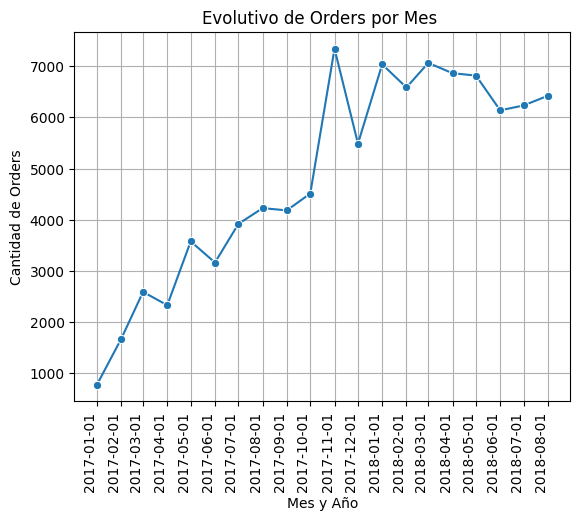

In [223]:
# Crear el DataFrame agrupando por mes la cantidad de orders únicas y ordenandolas de más antiguo a más nuevo
orders_por_mes = df_target_sales.groupby(['mes_anyo'])['order_id'].nunique().reset_index()
orders_por_mes['mes_anyo'] = pd.to_datetime(orders_por_mes['mes_anyo'], format='%Y%m')
orders_por_mes_sorted = orders_por_mes.sort_values(by='mes_anyo')
orders_por_mes_sorted

# Crear el gráfico con una línea para cada categoría
sns.lineplot(data=orders_por_mes_sorted, x='mes_anyo', y='order_id', marker="o",)

# Configurar el gráfico
plt.title('Evolutivo de Orders por Mes ')
plt.xlabel('Mes y Año')
plt.ylabel('Cantidad de Orders')
plt.xticks(orders_por_mes['mes_anyo'], rotation=90, ha='right')
plt.grid(True)
##plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar el gráfico
plt.show()

<Axes: xlabel='orders', ylabel='sellers'>

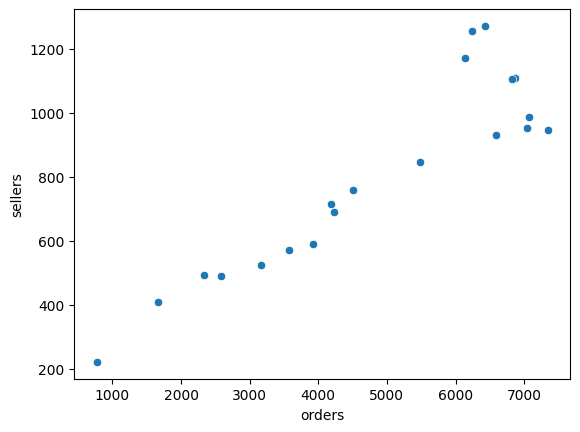

In [224]:
df_target_sales_grouped_orders_sellers = df_target_sales.groupby(['mes_anyo']).agg({'order_id':'nunique','seller_id':'nunique'})
df_target_sales_grouped_orders_sellers.rename(columns={'order_id':'orders','seller_id':'sellers'}, inplace=True)
sns.scatterplot(data=df_target_sales_grouped_orders_sellers, x='orders', y='sellers')

#### Lo que nos muestran los gráficos es que las ventas tienen un crecimiento extraordinario mes a mes, y que a su vez tienen una correlación muy alta con la cantidad de Sellers que hay en el ecommerce

### ---> Hipótesis 2:

#### ¿Cual es la distribución de compras por cliente? Que categorías compran los clientes más recurrentes?

<ipython-input-32-7a0f843c4ae3>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_target_sales_cleaned['mes_anyo'] = pd.to_datetime(df_target_sales_cleaned['mes_anyo'])
<ipython-input-32-7a0f843c4ae3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_target_sales_cleaned['mes_anyo'] = pd.to_datetime(df_target_sales_cleaned['mes_anyo'])


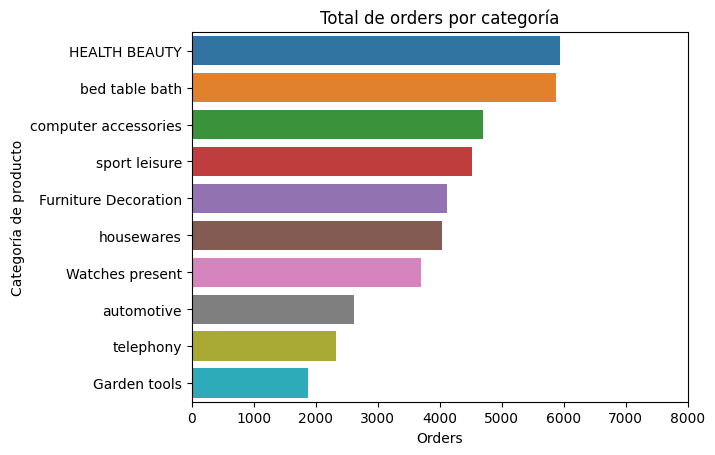

In [32]:
# Agrupar por mes, año y categoría y contar los pedidos
df_target_sales_cleaned['mes_anyo'] = pd.to_datetime(df_target_sales_cleaned['mes_anyo'])
orders_2018 = df_target_sales_cleaned[df_target_sales_cleaned['mes_anyo'] >= '2018-01-01']
orders_categoria = orders_2018.groupby(['product category'])['order_id'].count().reset_index()
orders_categoria_sorted_top10 = orders_categoria.sort_values(by='order_id',ascending=False).head(10)

# Crear el gráfico con una línea para cada categoría
sns.barplot(data=orders_categoria_sorted_top10, x='order_id', y='product category',hue='product category')


# Configurar el gráfico
plt.title('Total de orders por categoría')
plt.xlabel('Orders')
plt.ylabel('Categoría de producto')
plt.xlim(0, 8000)
##plt.xticks(rotation=90, ha='right')
##plt.grid(True)

# Mostrar el gráfico
plt.show()

#### Las categorías que destacan en orders son HEALTH BEAUTY,bed table bath,computer accesories,sport leisure,Furniture Decoration seguidas por housewares,watches present, automotive, telephony & garden tools

### ---> Hipótesis 3:

#### En que ciudades se llevan a cabo más compras? Y ventas? Y si lo vemos a nivel de revenue?

In [ ]:
df_agosto_2018 = df_prod_merged_ok[
    (df_prod_merged_ok['mes_anyo'].dt.year == 2018) &
    (df_prod_merged_ok['mes_anyo'].dt.month == 8)
]
df_agosto_2018['tamanyo_producto'] = df_agosto_2018['product_length_cm'] * df_prod_merged_ok['product_height_cm'] * df_prod_merged_ok['product_width_cm']

<ipython-input-137-679a699e68f2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_agosto_2018['tamanyo_producto'] = df_agosto_2018['product_length_cm'] * df_prod_merged_ok['product_height_cm'] * df_prod_merged_ok['product_width_cm']


<Axes: xlabel='freight_value', ylabel='tamanyo_producto'>

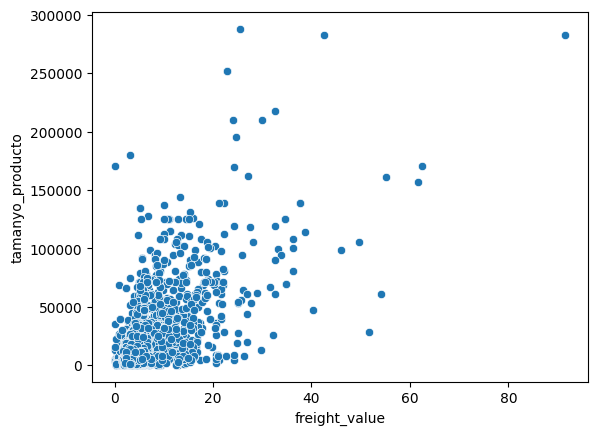

In [ ]:
sns.scatterplot(data=df_agosto_2018, x='freight_value', y='tamanyo_producto')

<Axes: xlabel='freight_value', ylabel='product_weight_g'>

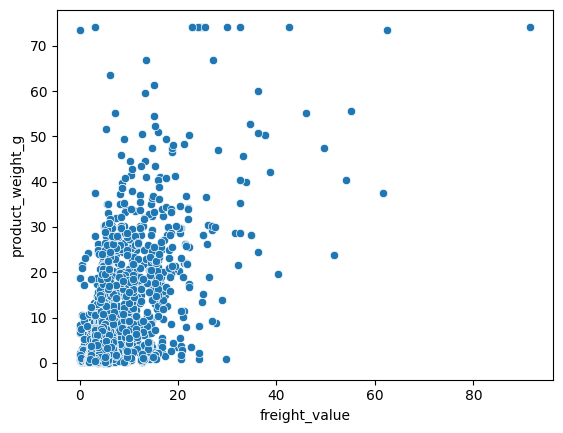

In [ ]:
sns.scatterplot(data=df_agosto_2018, x='freight_value', y='product_weight_g')

#### En relación al Tamaño: Si bien no es una relación tan directa, parece ser que a mayor tamaño mayor es el costo del envío

#### En relación al Peso: Si bien parece haber cierta relación, vemos muchos casos donde el peso del producto no infiere en el costo del envío

### ---> Hipótesis 4:

#### ¿Cuales son los tipos de pago más utilizados? Existe una relación entre la cantidad de cuotas seleccionadas con el valor de la order?

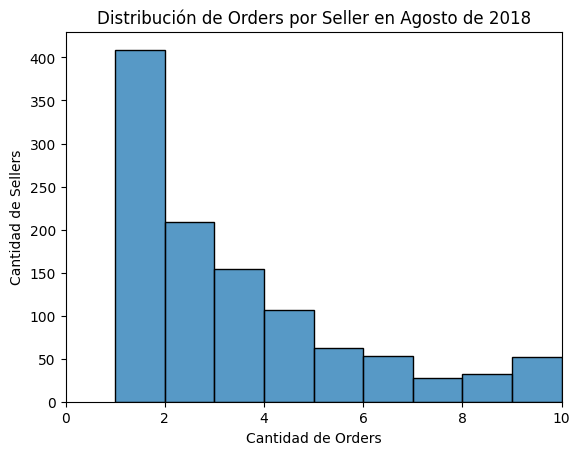

In [ ]:
# Filtrar df_prod_merged_ok por agosto de 2018
df_agosto_2018 = df_prod_merged_ok[
    (df_prod_merged_ok['mes_anyo'].dt.year == 2018) &
    (df_prod_merged_ok['mes_anyo'].dt.month == 8)
]

# Agrupar por seller_id y contar la cantidad de órdenes en agosto de 2018
orders_por_seller_agosto = df_agosto_2018.groupby('seller_id')['order_id'].count().reset_index()

# Crear el histograma
sns.histplot(data=orders_por_seller_agosto, x='order_id', bins=[1,2,3,4,5,6,7,8,9,10], stat='count')

# Configurar el gráfico
plt.title('Distribución de Orders por Seller en Agosto de 2018')
plt.xlabel('Cantidad de Orders')
plt.ylabel('Cantidad de Sellers')
plt.xlim(0, 10)
plt.show()

<ipython-input-136-7b351927cfb9>:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cluster_percentages = orders_por_seller_agosto.groupby('cluster')['seller_id'].count() / len(orders_por_seller_agosto) * 100


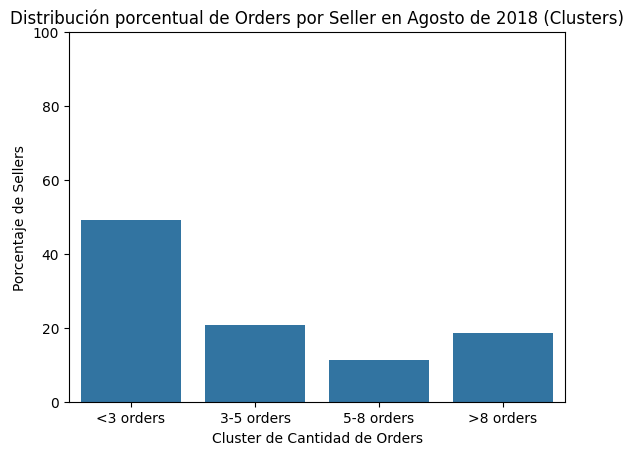

In [ ]:
# Filtrar df_prod_merged_ok por agosto de 2018
df_agosto_2018 = df_prod_merged_ok[
    (df_prod_merged_ok['mes_anyo'].dt.year == 2018) &
    (df_prod_merged_ok['mes_anyo'].dt.month == 8)
]

# Agrupar por seller_id y contar la cantidad de órdenes en agosto de 2018
orders_por_seller_agosto = df_agosto_2018.groupby('seller_id')['order_id'].count().reset_index()

# Crear una nueva columna 'cluster' para agrupar por cantidad de órdenes
orders_por_seller_agosto['cluster'] = pd.cut(
    orders_por_seller_agosto['order_id'],
    bins=[0, 3, 5, 8, float('inf')],
    labels=['<3 orders', '3-5 orders', '5-8 orders', '>8 orders'],
    right=False  # Incluir el límite inferior en el intervalo
)

# Agrupar por cluster y calcular el porcentaje de sellers
cluster_percentages = orders_por_seller_agosto.groupby('cluster')['seller_id'].count() / len(orders_por_seller_agosto) * 100

# Crear el histograma con porcentajes
sns.barplot(x=cluster_percentages.index, y=cluster_percentages.values)

# Configurar el gráfico
plt.title('Distribución porcentual de Orders por Seller en Agosto de 2018 (Clusters)')
plt.xlabel('Cluster de Cantidad de Orders')
plt.ylabel('Porcentaje de Sellers')
plt.ylim(0, 100)
plt.show()

#### La mayoría de los sellers solamente tienen asociado 1 sola order order al mes, que agrupados en el cluster de menos de 3 orders al mes hacen aproximadamente el 50%